Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json

1.Gathering Data

In [2]:
# twitter_archive_enhanced.csv
t_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
t_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Create folder
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# Download image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name, 
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
#  create img_predictions_df
img_predictions_df = pd.read_csv(folder_name + '/image-predictions.tsv', sep='\t')
img_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
# read in the JSON data from the text file, and save to a DataFrame
df_list = []
with open ('tweet-json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [5]:
print(df_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [6]:
#Creating Dataframe contains the id, retweet count, and favorite count
tweet_data = pd.DataFrame(df_list, columns = ['id','retweet_count','favorite_count'])

In [7]:
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [8]:
tweet_data = tweet_data.rename(columns = {'id':'tweet_id'})
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [9]:
tweet_data.to_csv('tweet_data.csv', index=False)

2.Assessing Data

In [10]:
t_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
t_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
t_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
t_archive_df.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [14]:
t_archive_df.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [15]:
t_archive_df.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Penny          10
Tucker         10
Lola           10
Bo              9
Winston         9
Sadie           8
the             8
Toby            7
an              7
Buddy           7
Daisy           7
Bailey          7
Milo            6
Leo             6
Bella           6
Dave            6
Oscar           6
Stanley         6
Koda            6
Rusty           6
Scout           6
Jax             6
Jack            6
Oakley          5
             ... 
Kane            1
Grey            1
JD              1
Murphy          1
Iroh            1
incredibly      1
Remy            1
Eugene          1
Coopson         1
Ozzie           1
Simba           1
Tripp           1
Dudley          1
Schnozz         1
Lilah           1
Lizzie          1
Laika           1
Miguel          1
Lugan           1
Amy             1
Bradley         1
Jessiga         1
Jazz            1
Katie           1
Rose      

In [16]:
img_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
img_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1055,714258258790387713,https://pbs.twimg.com/media/CemOGNjWQAEoN7R.jpg,1,collie,0.176758,True,Chesapeake_Bay_retriever,0.101834,True,beagle,0.101294,True
1182,738402415918125056,https://pbs.twimg.com/media/Cj9VEs_XAAAlTai.jpg,1,cocker_spaniel,0.346695,True,Blenheim_spaniel,0.193905,True,Chihuahua,0.078000,True
374,672995267319328768,https://pbs.twimg.com/media/CVb1mRiWcAADBsE.jpg,1,French_bulldog,0.719559,True,boxer,0.166927,True,Boston_bull,0.101354,True
384,673343217010679808,https://pbs.twimg.com/media/CVgyFSyU4AA9p1e.jpg,1,Chihuahua,0.541408,True,Italian_greyhound,0.156891,True,miniature_pinscher,0.069556,True
331,672125275208069120,https://pbs.twimg.com/media/CVPeX2dWwAEwyaR.jpg,1,tennis_ball,0.999834,False,golden_retriever,0.000087,True,racket,0.000053,False
1469,779056095788752897,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,Chihuahua,0.721188,True,toy_terrier,0.112943,True,kelpie,0.053365,True
491,675534494439489536,https://pbs.twimg.com/media/CV_7CV6XIAEV05u.jpg,1,chow,0.749368,True,schipperke,0.133738,True,Newfoundland,0.049914,True
1376,763183847194451968,https://pbs.twimg.com/media/CpdfpzKWYAAWSUi.jpg,1,miniature_poodle,0.354674,True,toy_poodle,0.338642,True,teddy,0.155828,False
1071,716439118184652801,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1219,743895849529389061,https://pbs.twimg.com/media/ClLZU8LWQAAsOxV.jpg,1,dalmatian,0.562315,True,Great_Dane,0.416478,True,German_short-haired_pointer,0.008552,True


In [17]:
img_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
img_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
img_predictions.loc[1900, 'jpg_url']

'https://pbs.twimg.com/media/C9ECujZXsAAPCSM.jpg'

In [20]:
from IPython.display import Image
Image(url = 'https://pbs.twimg.com/media/C9ECujZXsAAPCSM.jpg')

In [21]:
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [22]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [23]:
tweet_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [24]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


Quality (issues with content)

First

1. twitter_archive_df:

1.1 Only want original ratings (Delete the 181 retweets and 78 replies).

1.2 Don't need those columns: 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'img_num', 'expanded_urls' and 'jpg_url'.

1.3 All rating_denominator should be "10" and some rating_numerators are extreme values.
 
1.4 Since all the denominator is 10 after last step, we can get rid of rating_denominator column and change rating_numerators to 'rating'.

1.5 Many dog names are meesed up, such as "such" "a" "quite"...

1.6 timestamp have extra "+0000".

1.7 timestamp's datatype should be converted to "datatime".
2. img_predictions_df:

Second 

1 Remove "_" and capitalize the image predictions.(p1, p2, p3 column names)
3. tweets_data:

None
Tidiness (issues with structure)

First

0. Join 3 DataFrames.
1. twitter_archive_df:

1.1 Dog stage's 4 variables: doggo, floofer, pupper, puppo should be in single column of Categorical variable.

1.2 Dog stage have 'None' instead of np.nan.
2. img_predictions_df:

Second

1. Image prediction should be summarized to one column 'dog_breed'.
3. tweets_data:

3.1 Renamed the column id to tweet_id for easy merging.



* Cleaning Data

First need to create copies for each df

In [25]:
#create df copy
t_archive_df_clean = t_archive_df.copy()
img_predictions_df_clean = img_predictions_df.copy()
tweet_data_clean = tweet_data.copy()

In [26]:
t_archive_df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [27]:
img_predictions_df_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [28]:
tweet_data_clean.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


In [29]:
# merge 't_archive_df_clean' and 'img_predictions_df_clean'
master_df_clean = pd.merge(t_archive_df_clean, img_predictions_df_clean, on= 'tweet_id', how= 'left')
master_df_clean = pd.merge(master_df_clean, tweet_data_clean, on= 'tweet_id', how= 'left')

In [30]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

Tidiness Issue 1

Define: Dog stage's 4 variables: doggo, floofer, pupper, puppo should be in single column of Categorical variable.

Code: Create 'dog_stage' variable which is made by extracting the dog stage variables from the text column.

In [31]:
# Extracting the dog stage variable from the text cloumn when  available 
master_df_clean['dog_stage'] = master_df_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

# Drop 'doggo', 'floofer', 'pupper', 'puppo' columns
master_df_clean = master_df_clean.drop(columns =['doggo', 'floofer', 'pupper', 'puppo'])

Test

In [32]:
master_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0,NaN


In [33]:
master_df_clean.dog_stage.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

Tidiness Issue 2

Define: Dog stage have 'None' instead of np.nan

Code: Replace 'None' to np.nan

In [34]:
master_df_clean['dog_stage'].replace('None', np.nan, inplace=True)


Test

In [35]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                            2075 non-null object
p1_conf                       2075 non-null float64
p1_dog                        

Test

In [36]:
def function (text):
    txt_list = text.split()
    for word in txt_list:
        if word.lower() == 'named':
            name_index = txt_list.index(word) + 1 
            return txt_list[name_index]
        else:
            pass
        return np.nan

In [37]:
#checking number of null values in namefrom text columns, and return NaN if there is no 'named' word
sum(master_df_clean.name.isnull())    

0

In [38]:
sum(t_archive_df_clean.name.isnull())

0

In [39]:
# Convert tweet_id to srting
t_archive_df_clean.tweet_id = t_archive_df_clean.tweet_id.astype(str)

In [40]:
t_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [41]:
# Convert timestamp to datetime
t_archive_df_clean.timestamp = pd.to_datetime(t_archive_df_clean.timestamp)

In [42]:
t_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

Quality Issue 1

Define: Only want original ratings (Delete retweets and replies).

Code: Select the rows from twitter_archive_df that retweeted_status_id
    and in_reply_to_user_id columns that is null

In [43]:
# Drop the retweets
master_df_clean = master_df_clean[master_df_clean.retweeted_status_id.isnull()]

In [44]:
# Drop the replies
master_df_clean = master_df_clean[master_df_clean.in_reply_to_user_id.isnull()]

Test

In [45]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
jpg_url                       1971 non-null object
img_num                       1971 non-null float64
p1                            1971 non-null object
p1_conf                       1971 non-null float64
p1_dog                        1971 non

Quality Issue 2

Define: Only want tweets with imagine.

Code: Remove columns: 1.in_reply_to_status_id,
        2.in_reply_to_user_id, 3.retweeted_status_id,
        4.retweeted_status_user_id,
        5.retweeted_status_timestamp,
        6.img_num

In [46]:
master_df_clean = master_df_clean.drop(columns=['in_reply_to_status_id', 
                                               'in_reply_to_user_id', 
                                               'retweeted_status_id',
                                               'retweeted_status_user_id', 
                                               'retweeted_status_timestamp', 
                                               'img_num',
                                                'expanded_urls',
                                               'jpg_url'])

Test

In [47]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null object
retweet_count         2097 non-null float64
favorite_count        2097 non-null float64
dog_stage             353 non-null object
dtypes: float64(5), int64(3), object(11)
memory usage: 327.7+ KB


Quality Issue 3

Define 1: All rating_denominator should be "10".

In [48]:
master_df_clean.rating_denominator.value_counts()

10     2080
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [49]:
master_df_clean.drop(master_df_clean[master_df_clean.rating_denominator !=10].index, inplace=True)

Test

In [50]:
master_df_clean.rating_denominator.value_counts()

10    2080
Name: rating_denominator, dtype: int64

Define 2: Some rating_numerators are extreme values.

In [51]:
master_df_clean.rating_numerator.value_counts()

12      486
10      436
11      413
13      287
9       152
8        98
7        51
14       38
5        34
6        32
3        19
4        15
2         9
1         4
75        1
420       1
26        1
27        1
1776      1
0         1
Name: rating_numerator, dtype: int64

In [52]:
master_df_clean.drop(master_df_clean[master_df_clean.rating_numerator > 15].index, inplace = True)

Test

In [53]:
master_df_clean.rating_numerator.value_counts()

12    486
10    436
11    413
13    287
9     152
8      98
7      51
14     38
5      34
6      32
3      19
4      15
2       9
1       4
0       1
Name: rating_numerator, dtype: int64

Quality Issue 4:
    
Define: Since all the denominator is 10 after last step,
    we can get rid of rating_denominator column and change rating_numerators to 'rating

In [54]:
# Drop column
master_df_clean = master_df_clean.drop(columns=['rating_denominator'])
# Change column name
master_df_clean.rename(index=str, columns={"rating_numerator": "rating"}, inplace=True)

Test

In [55]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id          2075 non-null int64
timestamp         2075 non-null object
source            2075 non-null object
text              2075 non-null object
rating            2075 non-null int64
name              2075 non-null object
p1                1949 non-null object
p1_conf           1949 non-null float64
p1_dog            1949 non-null object
p2                1949 non-null object
p2_conf           1949 non-null float64
p2_dog            1949 non-null object
p3                1949 non-null object
p3_conf           1949 non-null float64
p3_dog            1949 non-null object
retweet_count     2075 non-null float64
favorite_count    2075 non-null float64
dog_stage         346 non-null object
dtypes: float64(5), int64(2), object(11)
memory usage: 308.0+ KB


Quality Issue 5:

Define 1.5: Many dog names are meesed up, such as "such" "a" "quite"


In [56]:
# check the incorrect names
list(master_df_clean.name)

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 'None',
 'None',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'None',
 'None',
 'Earl',
 'Lola',
 'Kevin',
 'None',
 'None',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'None',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'a',
 'Elliot',
 'Louis',
 'None',
 'Bella',
 'Jesse',
 'None',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Steven',
 'Beau',
 'Snoopy',
 'None',
 'Shadow',
 'Emmy',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'None',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'None',
 'None',
 'Cash',
 'Jed',
 'None',
 'Sebastian',
 'None',
 'Sierra',
 'None',
 'None',
 'Monkey',
 'None',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'None',
 'Boomer',
 'None',
 'Cody',
 'Zoey',
 'Rumble',


In [57]:
# replace inccorect names to "None"
def incorrect_name(row):
    if row['name'][0].islower() == True:
        return 'None'
    else:
        return row['name']

master_df_clean['name'] = master_df_clean.apply(incorrect_name, axis = 1)

master_df_clean['name'].replace('None', np.nan, inplace=True)

Test

In [58]:
list(master_df_clean.name)

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 nan,
 'Jax',
 nan,
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 nan,
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Gerald',
 'Jeffrey',
 nan,
 'Canela',
 nan,
 nan,
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 nan,
 nan,
 'Earl',
 'Lola',
 'Kevin',
 nan,
 nan,
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 nan,
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 nan,
 'Elliot',
 'Louis',
 nan,
 'Bella',
 'Jesse',
 nan,
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Steven',
 'Beau',
 'Snoopy',
 nan,
 'Shadow',
 'Emmy',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 nan,
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 nan,
 nan,
 'Cash',
 'Jed',
 nan,
 'Sebastian',
 nan,
 'Sierra',
 nan,
 nan,
 'Monkey',
 nan,
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 nan,
 'Boomer',
 nan,
 'Cody',
 'Zoey',
 'Rumble',
 'Clifford',
 'Dewey',
 'Stanley',
 'Scout',
 'Gizmo',
 'Walter',
 nan,


Quality Issue 6

In [59]:
master_df_clean.timestamp

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
5       2017-07-29 00:08:17 +0000
6       2017-07-28 16:27:12 +0000
7       2017-07-28 00:22:40 +0000
8       2017-07-27 16:25:51 +0000
9       2017-07-26 15:59:51 +0000
10      2017-07-26 00:31:25 +0000
11      2017-07-25 16:11:53 +0000
12      2017-07-25 01:55:32 +0000
13      2017-07-25 00:10:02 +0000
14      2017-07-24 17:02:04 +0000
15      2017-07-24 00:19:32 +0000
16      2017-07-23 00:22:39 +0000
17      2017-07-22 16:56:37 +0000
18      2017-07-22 00:23:06 +0000
20      2017-07-20 16:49:33 +0000
21      2017-07-19 16:06:48 +0000
22      2017-07-19 03:39:09 +0000
23      2017-07-19 00:47:34 +0000
24      2017-07-18 16:08:03 +0000
25      2017-07-18 00:07:08 +0000
26      2017-07-17 16:17:36 +0000
27      2017-07-16 23:58:41 +0000
28      2017-07-16 20:14:00 +0000
29      2017-07-15 23:25:31 +0000
31      2017-0

Define 6: timestamp have extra "+0000".

In [60]:
# Strip +0000 from timestamp column
master_df_clean.timestamp = master_df_clean.timestamp.str.strip('+0000')

In [61]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id          2075 non-null int64
timestamp         2075 non-null object
source            2075 non-null object
text              2075 non-null object
rating            2075 non-null int64
name              1384 non-null object
p1                1949 non-null object
p1_conf           1949 non-null float64
p1_dog            1949 non-null object
p2                1949 non-null object
p2_conf           1949 non-null float64
p2_dog            1949 non-null object
p3                1949 non-null object
p3_conf           1949 non-null float64
p3_dog            1949 non-null object
retweet_count     2075 non-null float64
favorite_count    2075 non-null float64
dog_stage         346 non-null object
dtypes: float64(5), int64(2), object(11)
memory usage: 388.0+ KB


Quality Issue 7 

Define 7: timestamp's datatype should be converted to "datatime".

In [62]:
# Convert data type to datetime
master_df_clean.timestamp = pd.to_datetime(master_df_clean.timestamp)

In [63]:
master_df_clean.timestamp

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
20     2017-07-20 16:49:33
21     2017-07-19 16:06:48
22     2017-07-19 03:39:09
23     2017-07-19 00:47:34
24     2017-07-18 16:08:03
25     2017-07-18 00:07:08
26     2017-07-17 16:17:36
27     2017-07-16 23:58:41
28     2017-07-16 20:14:00
29     2017-07-15 23:25:31
31     2017-07-15 16:17:19
               ...        
2325   2015-11-17 00:53:15
2326   2015-11-17 00:24:19
2327   2015-11-17 00:06:54
2328   2015-11-16 23:23:41
2329   2015-11-16 21:54:18
2330   2015-11-16 21:10:36
2

Quality Issue 8:
    
Define : Source data column is not clear

In [64]:
master_df_clean.source[10]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [65]:
# Use regex and str.extract toget the real source
master_df_clean['source'] = master_df_clean['source'].str.extract('>(.*)<')

Test

In [66]:
master_df_clean.source

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
5       Twitter for iPhone
6       Twitter for iPhone
7       Twitter for iPhone
8       Twitter for iPhone
9       Twitter for iPhone
10      Twitter for iPhone
11      Twitter for iPhone
12      Twitter for iPhone
13      Twitter for iPhone
14      Twitter for iPhone
15      Twitter for iPhone
16      Twitter for iPhone
17      Twitter for iPhone
18      Twitter for iPhone
20      Twitter for iPhone
21      Twitter for iPhone
22      Twitter for iPhone
23      Twitter for iPhone
24      Twitter for iPhone
25      Twitter for iPhone
26      Twitter for iPhone
27      Twitter for iPhone
28      Twitter for iPhone
29      Twitter for iPhone
31      Twitter for iPhone
               ...        
2325    Twitter for iPhone
2326    Twitter for iPhone
2327    Twitter for iPhone
2328    Twitter for iPhone
2329    Twitter for iPhone
2330    Twitter for iPhone
2

In [67]:
master_df_clean.source.value_counts()

Twitter for iPhone     1943
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

* Second

Cleaning Data

Quality Issue

Define 1: Remove "_" and use all lowercases for the image predictions.(p1, p2, p3 column names)

In [68]:
# Use Series.str.replace to remove '_'
master_df_clean['p1'] = master_df_clean['p1'].str.replace('_', " ")
master_df_clean['p2'] = master_df_clean['p2'].str.replace('_', " ")
master_df_clean['p3'] = master_df_clean['p3'].str.replace('_', " ")

In [69]:
# Use Series.str.capitalize to convert 'p1' 'p2' 'p3'
master_df_clean['p1'] = master_df_clean['p1'].str.title()
master_df_clean['p2'] = master_df_clean['p2'].str.title()
master_df_clean['p3'] = master_df_clean['p3'].str.title()

Test

In [70]:
master_df_clean.p1

0                            Orange
1                         Chihuahua
2                         Chihuahua
3                       Paper Towel
4                            Basset
5          Chesapeake Bay Retriever
6                       Appenzeller
7                        Pomeranian
8                     Irish Terrier
9                          Pembroke
10                          Samoyed
11                   French Bulldog
12                         Pembroke
13                   French Bulldog
14                 Golden Retriever
15                          Whippet
16                 Golden Retriever
17                 Golden Retriever
18                   Siberian Husky
20                   French Bulldog
21                           Basset
22                        Limousine
23                         Pembroke
24                 Mexican Hairless
25                          Samoyed
26                        Chihuahua
27                           Kuvasz
28                      Conv

* Second 

Tidiness Issue


In [71]:
# image prediction should be summarized to one column 'dog_breed'

# Define function to fill in ture prediction
def breed_pred(row):
    if row['p1_dog']:
        return row['p1']
    elif row['p2_dog']:
        return row['p2']
    elif row['p3_dog']:
        return row['p3']
    else:
        return np.nan

master_df_clean['dog_breed'] = master_df_clean.apply(breed_pred, axis = 1)

# Drop extra columns
master_df_clean = master_df_clean.drop(columns=['p1', 'p1_conf', 'p1_dog',
                                                'p2', 'p2_conf', 'p2_dog',
                                                'p3', 'p3_conf', 'p3_dog'])

Test

In [72]:
master_df_clean.dog_breed

0                               NaN
1                         Chihuahua
2                         Chihuahua
3                Labrador Retriever
4                            Basset
5          Chesapeake Bay Retriever
6                       Appenzeller
7                        Pomeranian
8                     Irish Terrier
9                          Pembroke
10                          Samoyed
11                   French Bulldog
12                         Pembroke
13                   French Bulldog
14                 Golden Retriever
15                          Whippet
16                 Golden Retriever
17                 Golden Retriever
18                   Siberian Husky
20                   French Bulldog
21                           Basset
22                              NaN
23                         Pembroke
24                 Mexican Hairless
25                          Samoyed
26                        Chihuahua
27                           Kuvasz
28                          

Final check master_df

In [73]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id          2075 non-null int64
timestamp         2075 non-null datetime64[ns]
source            2075 non-null object
text              2075 non-null object
rating            2075 non-null int64
name              1384 non-null object
retweet_count     2075 non-null float64
favorite_count    2075 non-null float64
dog_stage         346 non-null object
dog_breed         1647 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 258.3+ KB


Storing DataFrame

In [74]:
master_df_clean.to_csv('tweitter_archive_master.csv')

Data Analysis And Visualization

In [75]:
master_df_clean.head()

,tweet_id,timestamp,source,text,rating,name,retweet_count,favorite_count,dog_stage,dog_breed
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,Phineas,8853.0,39467.0,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,Tilly,6514.0,33819.0,NaN,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,Archie,4328.0,25461.0,NaN,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,Darla,8964.0,42908.0,NaN,Labrador Retriever
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,Franklin,9774.0,41048.0,NaN,Basset


In [76]:
master_df_clean.shape

(2075, 10)

In [77]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id          2075 non-null int64
timestamp         2075 non-null datetime64[ns]
source            2075 non-null object
text              2075 non-null object
rating            2075 non-null int64
name              1384 non-null object
retweet_count     2075 non-null float64
favorite_count    2075 non-null float64
dog_stage         346 non-null object
dog_breed         1647 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 258.3+ KB


In [78]:
master_df_clean.describe()

,tweet_id,rating,retweet_count,favorite_count
count,2.075000e+03,2075.000000,2075.000000,2075.000000
mean,7.367111e+17,10.606265,2842.314699,9002.981687
std,6.728544e+16,2.153837,4720.860770,12242.464489
min,6.660209e+17,0.000000,16.000000,81.000000
25%,6.766970e+17,10.000000,642.000000,2042.500000
50%,7.095662e+17,11.000000,1402.000000,4195.000000
75%,7.881644e+17,12.000000,3288.000000,11459.500000
max,8.924206e+17,14.000000,79515.000000,132810.000000


In [79]:
master_df_clean.corr()

,tweet_id,rating,retweet_count,favorite_count
tweet_id,1.000000,0.525855,0.400916,0.651895
rating,0.525855,1.000000,0.310834,0.407833
retweet_count,0.400916,0.310834,1.000000,0.911282
favorite_count,0.651895,0.407833,0.911282,1.000000


In [80]:
stage_df = master_df_clean.dog_stage.value_counts()
stage_df

pupper     234
doggo       79
puppo       29
floofer      4
Name: dog_stage, dtype: int64

(-1.1074044985638711,
 1.100352595763449,
 -1.1302483570036739,
 1.1054051611172757)

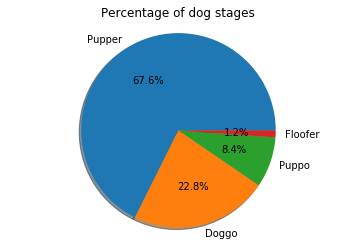

In [81]:
# Creating a pie chart of different dog stages.
plt.pie(stage_df,
        labels = ['Pupper','Doggo', 'Puppo', 'Floofer'], 
       autopct = '%1.1f%%',
       shadow=True)
plt.title('Percentage of dog stages')
plt.axis('equal')

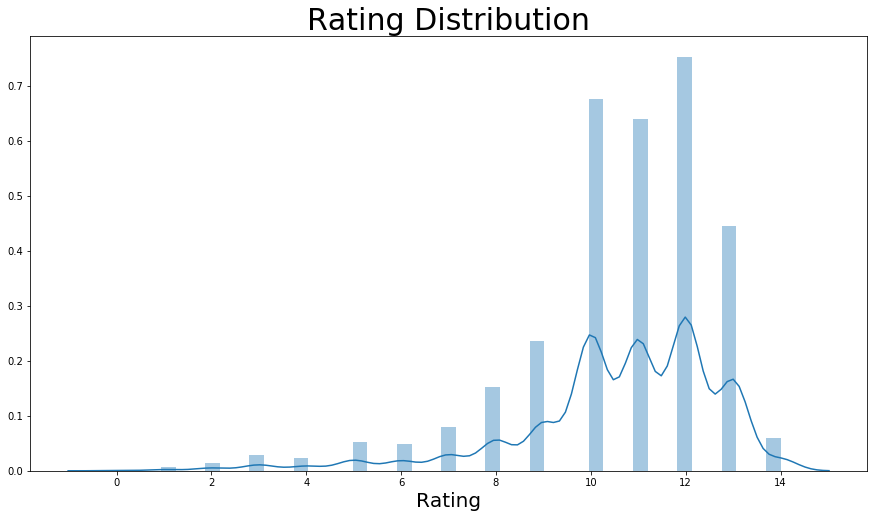

In [82]:
# Visualization for dog rating distribution:
plt.figure(figsize=(15,8))
plt.title("Rating Distribution", size=30)
sns.distplot(master_df_clean.rating)
plt.xlabel("Rating", size=20);